In [2]:
import pandas as pd
import numpy as np


In [3]:

### Describtion

# > Варіант №2 "Spotify"
# Цей набір даних містить  список найвідоміших пісень 2023 року, розміщених на Spotify. Набір даних пропонує велику кількість можливостей, крім того, що зазвичай доступно в подібних наборах даних. Він надає інформацію про характеристики і популярність пісень, містить таку інформацію, як назва композиції, ім’я виконавця (виконавців), дата випуску, списки відтворення та чарти Spotify, статистика потокового передавання та різноманітні аудіофункції.
#
# track_name: Name of the song
# artist(s)_name: Name of the artist(s) of the song
# artist_count: Number of artists contributing to the song
# released_year: Year when the song was released
# released_month: Month when the song was released
# released_day: Day of the month when the song was released
# in_spotify_playlists: Number of Spotify playlists the song is included in
# in_spotify_charts: Presence and rank of the song on Spotify charts
# streams: Total number of streams on Spotify
# bpm: Beats per minute, a measure of song tempo
# key: Key of the song
# mode: Mode of the song (major or minor)
# danceability_%: Percentage indicating how suitable the song is for dancing
# valence_%: Positivity of the song's musical content
# energy_%: Perceived energy level of the song
# acousticness_%: Amount of acoustic sound in the song
# instrumentalness_%: Amount of instrumental content in the song
# liveness_%: Presence of live performance elements
# speechiness_%: Amount of spoken words in the song

# аналіз:графік зображує дані платформи спотіфай. деякі зх них є "зіпсованими"(нульовими, від'ємними, не підходящими до
# загального типу даних у колонці)


In [4]:
spotify = pd.read_csv("spotify_2023.csv", index_col="Unnamed: 0")

In [5]:
spotify

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,bpm,key,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,125,B,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,92,C#,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,138,F,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,170,A,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,144,A,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,144,A,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,166,F#,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,92,C#,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,97,C#,82,67,77,8,0,12,5


In [6]:
spotify.shape

(953, 18)

In [7]:
spotify.dtypes
# here i'm nalyzing type of data it each column. we see that we have numerical type in columns about date

track_name              object
artist(s)_name          object
artist_count             int64
released_year            int64
released_month          object
released_day             int64
in_spotify_playlists     int64
in_spotify_charts        int64
streams                 object
bpm                      int64
key                     object
danceability_%           int64
valence_%                int64
energy_%                 int64
acousticness_%           int64
instrumentalness_%       int64
liveness_%               int64
speechiness_%            int64
dtype: object

In [8]:
spotify = spotify.dropna()
spotify.shape
# we see that rows amount has been changed

(855, 18)

In [9]:
# here i'm making boolean mask (dict) for data in months which was written incorrectly. we see that this column has object type
month_mapping = \
    {
    'січень': 1,
    'лютий': 2,
    'березень': 3,
    'квітень': 4,
    'травень': 5,
    'червень': 6,
    'липень': 7,
    'серпень': 8,
    'вересень': 9,
    'жовтень': 10,
    'листопад': 11,
    'грудень': 12
    }

spotify.loc[:, 'released_month'] = spotify['released_month'].apply(lambda x: month_mapping.get(x, x))
# using boolean mask via dict for giving str type cells numeric value

In [10]:
# correcting negative years, streams values
spotify['released_year'] = spotify['released_year'].abs()
spotify['streams'] = pd.to_numeric(spotify['streams'], errors='coerce')
spotify['streams'] = spotify['streams'].abs()
# converting all info about datesm to  1 column values and formatuemo yiyi
date = spotify['released_year'].astype(str) + '-' + spotify['released_month'].astype(str) + '-' + spotify['released_day'].astype(str)
spotify['date'] = pd.to_datetime(date, format='%Y-%m-%d', errors='coerce')


/var/folders/_p/ql4p8w016wd394h202vwvm1m0000gn/T/ipykernel_4426/3909918724.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spotify['released_year'] = spotify['released_year'].abs()
/var/folders/_p/ql4p8w016wd394h202vwvm1m0000gn/T/ipykernel_4426/3909918724.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spotify['streams'] = pd.to_numeric(spotify['streams'], errors='coerce')
/var/folders/_p/ql4p8w016wd394h202vwvm1m0000gn/T/ipykernel_4426/3909918724.py:4: SettingWithCopyWarning: 
A value is trying to b

In [11]:
spotify.dtypes
# checking out dtypes

track_name                      object
artist(s)_name                  object
artist_count                     int64
released_year                    int64
released_month                  object
released_day                     int64
in_spotify_playlists             int64
in_spotify_charts                int64
streams                        float64
bpm                              int64
key                             object
danceability_%                   int64
valence_%                        int64
energy_%                         int64
acousticness_%                   int64
instrumentalness_%               int64
liveness_%                       int64
speechiness_%                    int64
date                    datetime64[ns]
dtype: object

In [12]:
spotify_sorted_date =spotify.sort_values(by='date', ascending=False)
spotify_sorted_date
# sorting by years

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,bpm,key,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,date
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703.0,125,B,80,89,83,31,0,8,4,2023-07-14
68,Overdrive,Post Malone,1,2023,7,14,410,36,14780425.0,140,C#,56,48,73,0,0,35,4,2023-07-14
30,Rush,Troye Sivan,1,2023,7,13,864,78,22581161.0,126,F,74,35,84,0,0,11,6,2023-07-13
193,Better Than Revenge (Taylor's Version),Taylor Swift,1,2023,7,7,86,11,30343206.0,146,B,50,67,89,0,0,19,8,2023-07-07
21,I Can See You (TaylorпїЅпїЅпїЅs Version) (From...,Taylor Swift,1,2023,7,7,516,38,52135248.0,123,F#,69,82,76,6,0,6,3,2023-07-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
444,Jingle Bell Rock,Bobby Helms,1,1957,1,1,10326,0,741301563.0,119,D,74,78,37,84,0,6,3,1957-01-01
466,Let It Snow! Let It Snow! Let It Snow!,"Frank Sinatra, B. Swanson Quartet",2,1950,1,1,10585,0,473248298.0,143,D,60,86,32,88,0,34,6,1950-01-01
460,The Christmas Song (Merry Christmas To You) - ...,Nat King Cole,1,1946,11,1,11500,0,389771964.0,139,C#,36,22,15,84,0,11,4,1946-11-01
469,White Christmas,"Bing Crosby, John Scott Trotter & His Orchestr...",3,1942,1,1,11940,0,395591396.0,96,A,23,19,25,91,0,40,3,1942-01-01


In [13]:
# dropping rows with release date and renaming 1 column
spotify = spotify.drop(columns=["released_day"])
spotify = spotify.rename(columns={"artist(s)_name": "artist_name"})
spotify

,track_name,artist_name,artist_count,released_year,released_month,in_spotify_playlists,in_spotify_charts,streams,bpm,key,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,date
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,553,147,141381703.0,125,B,80,89,83,31,0,8,4,2023-07-14
1,LALA,Myke Towers,1,2023,3,1474,48,133716286.0,92,C#,71,61,74,7,0,10,4,2023-03-23
2,vampire,Olivia Rodrigo,1,2023,6,1397,113,140003974.0,138,F,51,32,53,17,0,31,6,2023-06-30
3,Cruel Summer,Taylor Swift,1,2019,8,7858,100,800840817.0,170,A,55,58,72,11,0,11,15,2019-08-23
4,WHERE SHE GOES,Bad Bunny,1,2023,5,3133,50,303236322.0,144,A,65,23,80,14,63,11,6,2023-05-18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,953,0,91473363.0,144,A,60,24,39,57,0,8,3,2022-11-03
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,1180,0,121871870.0,166,F#,42,7,24,83,1,12,6,2022-10-21
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,573,0,73513683.0,92,C#,80,81,67,4,0,8,6,2022-11-03
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,1320,0,133895612.0,97,C#,82,67,77,8,0,12,5,2022-10-20


In [14]:
spotify.describe()
# short info walkthrough

,artist_count,released_year,in_spotify_playlists,in_spotify_charts,streams,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,date
count,855.000000,855.000000,855.000000,855.000000,8.540000e+02,855.000000,855.000000,855.000000,855.000000,855.000000,855.000000,855.000000,855.000000,855
mean,1.550877,2018.224561,5219.907602,11.977778,5.149008e+08,122.828070,67.221053,51.244444,64.355556,26.581287,1.615205,18.190643,10.400000,2018-09-04 23:07:47.368420864
min,1.000000,1930.000000,31.000000,0.000000,2.762000e+03,65.000000,23.000000,4.000000,14.000000,0.000000,0.000000,3.000000,2.000000,1930-01-01 00:00:00
25%,1.000000,2020.000000,867.500000,0.000000,1.398780e+08,100.000000,57.000000,32.000000,53.500000,5.000000,0.000000,10.000000,4.000000,2020-05-28 00:00:00
50%,1.000000,2022.000000,2229.000000,3.000000,2.865698e+08,121.000000,70.000000,51.000000,66.000000,17.000000,0.000000,12.000000,6.000000,2022-04-08 00:00:00
75%,2.000000,2022.000000,5605.500000,16.000000,6.745979e+08,141.500000,78.000000,70.000000,76.000000,42.000000,0.000000,24.000000,12.000000,2022-11-04 00:00:00
max,8.000000,2023.000000,52898.000000,147.000000,3.703895e+09,206.000000,96.000000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000,2023-07-14 00:00:00
std,0.865374,11.123686,7948.133131,19.211828,5.718872e+08,28.202673,14.663326,23.579253,16.020475,25.652289,8.580409,13.576133,10.101661,NaN


In [15]:
# let's find the most usually-appeaered in charts (top-5) songs on the platform(ever)
top5 = spotify.groupby(["track_name","released_year"])[["in_spotify_charts"]].sum()
top5 = top5.sort_values("in_spotify_charts", ascending=False)
top5.head(5)

,,in_spotify_charts
track_name,released_year,
Seven (feat. Latto) (Explicit Ver.),2023,147
As It Was,2022,130
vampire,2023,113
Dance The Night (From Barbie The Album),2023,101
Cruel Summer,2019,100


In [16]:
# counting the savings to playlists of songs released each year
top = spotify.groupby("released_year")["in_spotify_playlists"].idxmax()
top = spotify.loc[top, ["released_year", "track_name", "in_spotify_playlists"]]
top = top.sort_values('released_year', ascending=False)
topplot = top.groupby(["released_year", "track_name"])
topplot =topplot.head(10)

/Users/tsaebst/Zalik/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:891: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "-*" (-> marker='*'). The keyword argument will take precedence.
  return ax.plot(*args, **kwds)


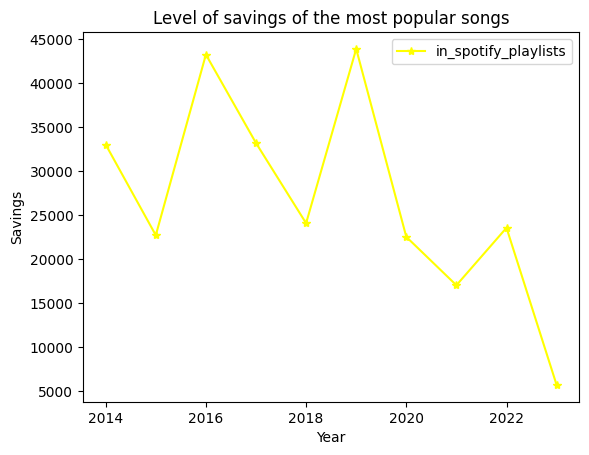

In [17]:
# let's output how level of savings to playlists  was chanhing during the 10 years gap
top.head(10).plot(style='-*',y="in_spotify_playlists", x="released_year", marker="*",color='yellow', xlabel="Year", ylabel="Savings", title="Level of savings of the most popular songs");

In [18]:
# let's find the most popular songs in timegap from 01.01.22 to 31.12.22
tmps = spotify.loc[spotify["released_year"] == 2022]
tmps = tmps.groupby(["track_name", "released_month"])["streams"].sum()
tmps = tmps.sort_values(ascending=False )
tmps

track_name                                         released_month
As It Was                                          3                 2.513188e+09
Me Porto Bonito                                    5                 1.440758e+09
Quevedo: Bzrp Music Sessions, Vol. 52              7                 1.356565e+09
Titi Me Preguntпї                                  5                 1.264311e+09
Unholy (feat. Kim Petras)                          9                 1.230676e+09
                                                                         ...     
Savior - Interlude                                 5                 3.709158e+07
Mother I Sober (feat. Beth Gibbons of Portishead)  5                 3.338145e+07
Phantom Regret by Jim                              1                 3.195957e+07
Jhoome Jo Pathaan                                  12                1.365184e+06
Que Vuelvas                                        12                2.762000e+03
Name: streams, Length: 361, dtyp

<Axes: title={'center': 'The most often played songs in 2022'}, xlabel='Times have been played', ylabel='Name of song'>

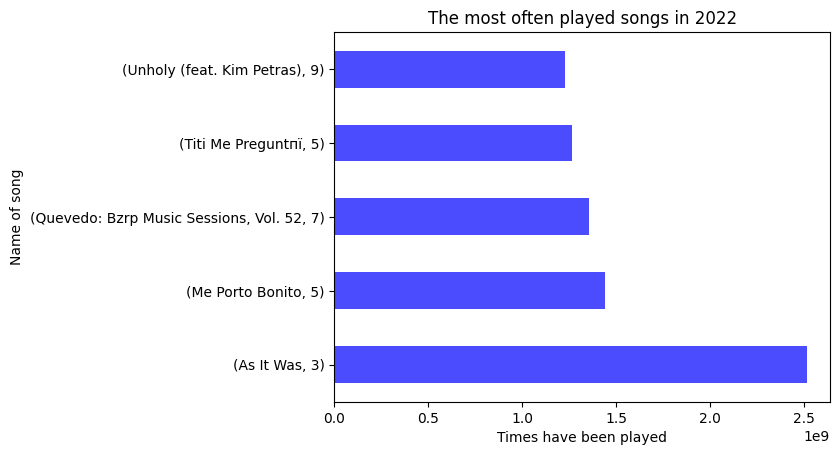

In [19]:
# outputting them
tmps.head(5).plot.barh(color='blue', alpha=0.7, title="The most often played songs in 2022", ylabel="Name of song", xlabel="Times have been played")

In [20]:
# creating a vibe column
vibe_map = {
        'A': "major",
    'C': "minor",
    'C#': "major",
    'F': "minor",
    'F#': "major",
    'D': "major",
    'D#': "minor",
    'A#': "minor",
    'B': "minor",
    'B#': "major",
    'E': "minor",
    'E#': "major",
    "G":"major",
    "G#":"minor"
}
spotify['vibe'] = spotify['key'].apply(lambda x: vibe_map.get(x, x)).dropna()

# creating new column "vibe"

In [21]:
# now let's compare the popularity of magor and minor genres of songs trough 2022 year
minor = spotify.loc[(spotify["vibe"]=="minor")&(spotify["released_year"]==2022)]
minor


,track_name,artist_name,artist_count,released_year,released_month,in_spotify_playlists,in_spotify_charts,streams,bpm,key,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,date,vibe
15,Kill Bill,SZA,1,2022,12,8109,77,1.163094e+09,89,G#,64,43,73,5,17,16,4,2022-12-08,minor
26,Calm Down (with Selena Gomez),"RпїЅпїЅma, Selena G",2,2022,3,7112,77,8.991834e+08,107,B,80,82,80,43,0,14,4,2022-03-25,minor
33,Anti-Hero,Taylor Swift,1,2022,10,9082,56,9.997483e+08,97,E,64,51,63,12,0,19,5,2022-10-21,minor
66,Karma,Taylor Swift,1,2022,10,3818,23,4.045628e+08,90,G#,64,10,62,7,0,48,7,2022-10-21,minor
67,People,Libianca,1,2022,12,3506,56,3.732000e+08,198,A#,59,71,42,55,0,10,7,2022-12-02,minor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
943,Privileged Rappers,"Drake, 21 Savage",2,2022,11,1007,0,1.124364e+08,144,F,93,62,61,0,0,12,20,2022-11-04,minor
944,The Astronaut,Jin,1,2022,10,481,9,2.034365e+08,125,F,54,22,76,0,0,14,3,2022-10-28,minor
945,BackOutsideBoyz,Drake,1,2022,11,1045,0,9.336754e+07,142,F,85,40,43,4,0,39,32,2022-11-04,minor
947,The Great War,Taylor Swift,1,2022,10,1274,0,1.813826e+08,96,F,57,55,74,22,0,8,4,2022-10-21,minor


In [22]:
major = spotify.loc[(spotify["vibe"]=="major")&(spotify["released_year"]==2022)]
major

,track_name,artist_name,artist_count,released_year,released_month,in_spotify_playlists,in_spotify_charts,streams,bpm,key,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,date,vibe
14,As It Was,Harry Styles,1,2022,3,23575,130,2.513188e+09,174,F#,52,66,73,34,0,31,6,2022-03-31,major
32,Creepin',"The Weeknd, 21 Savage, Metro Boomin",3,2022,12,6036,88,8.439575e+08,98,C#,71,17,61,36,0,8,5,2022-12-02,major
42,I'm Good (Blue),"Bebe Rexha, David Guetta",2,2022,8,12482,80,1.109433e+09,128,G,56,38,97,4,0,35,4,2022-08-26,major
57,La Bachata,Manuel Turizo,1,2022,5,6804,45,1.214083e+09,125,G,84,85,68,58,0,22,4,2022-05-26,major
62,Left and Right (Feat. Jung Kook of BTS),"Charlie Puth, BTS, Jung Kook",3,2022,6,3107,39,7.204342e+08,101,D,88,72,59,62,0,9,3,2022-06-24,major
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
946,Broke Boys,"Drake, 21 Savage",2,2022,11,1060,0,1.062492e+08,120,D,64,11,53,1,0,25,27,2022-11-04,major
948,My Mind & Me,Selena Gomez,1,2022,11,953,0,9.147336e+07,144,A,60,24,39,57,0,8,3,2022-11-03,major
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,1180,0,1.218719e+08,166,F#,42,7,24,83,1,12,6,2022-10-21,major
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,573,0,7.351368e+07,92,C#,80,81,67,4,0,8,6,2022-11-03,major


In [23]:
spotify

,track_name,artist_name,artist_count,released_year,released_month,in_spotify_playlists,in_spotify_charts,streams,bpm,key,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,date,vibe
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,553,147,141381703.0,125,B,80,89,83,31,0,8,4,2023-07-14,minor
1,LALA,Myke Towers,1,2023,3,1474,48,133716286.0,92,C#,71,61,74,7,0,10,4,2023-03-23,major
2,vampire,Olivia Rodrigo,1,2023,6,1397,113,140003974.0,138,F,51,32,53,17,0,31,6,2023-06-30,minor
3,Cruel Summer,Taylor Swift,1,2019,8,7858,100,800840817.0,170,A,55,58,72,11,0,11,15,2019-08-23,major
4,WHERE SHE GOES,Bad Bunny,1,2023,5,3133,50,303236322.0,144,A,65,23,80,14,63,11,6,2023-05-18,major
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,953,0,91473363.0,144,A,60,24,39,57,0,8,3,2022-11-03,major
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,1180,0,121871870.0,166,F#,42,7,24,83,1,12,6,2022-10-21,major
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,573,0,73513683.0,92,C#,80,81,67,4,0,8,6,2022-11-03,major
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,1320,0,133895612.0,97,C#,82,67,77,8,0,12,5,2022-10-20,major


In [24]:
# let's see how prevailoing vibe  of songs was changing trough 2 decades
box = spotify[['streams', 'vibe', 'released_year']]
box_filtered = box[(box['released_year'] >= 2000) & (box['released_year'] <= 2020)]
annual_sum = box_filtered.groupby(['vibe', 'released_year'])['streams'].sum()
annual_sum = annual_sum.reset_index().pivot(index='released_year', columns='vibe', values='streams')
annual_sum

vibe,major,minor
released_year,,
2000,6.241020e+08,3.048755e+09
2002,6.416092e+09,2.263631e+09
2003,3.168043e+09,NaN
2004,1.089402e+09,1.768592e+09
2005,NaN,1.805775e+08
2008,NaN,2.480816e+09
2010,1.603611e+09,4.686794e+09
2011,7.098512e+09,8.075619e+08
2012,9.408860e+08,1.081327e+10


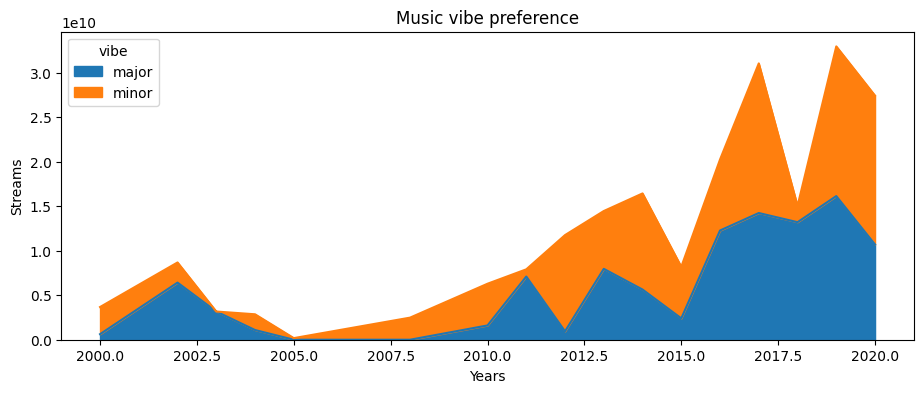

In [25]:
annual_sum.plot.area(title="Music vibe preference", ylabel="Streams", xlabel="Years", figsize=(11,4));

In [26]:
# let's researc the montly releases count for 2015-2021 years

In [27]:
release_freq = spotify[['date', 'streams', "released_month"]]
release_freq.set_index('date', inplace=True)
release_freq

,streams,released_month
date,,
2023-07-14,141381703.0,7
2023-03-23,133716286.0,3
2023-06-30,140003974.0,6
2019-08-23,800840817.0,8
2023-05-18,303236322.0,5
...,...,...
2022-11-03,91473363.0,11
2022-10-21,121871870.0,10
2022-11-03,73513683.0,11


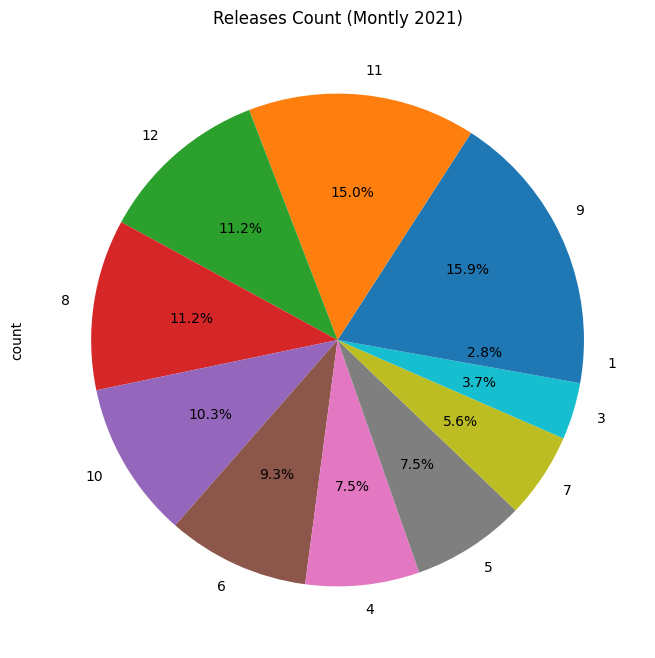

In [28]:
releases_2021 = spotify[spotify['released_year'] == 2021]
releases_2021 = releases_2021['released_month'].value_counts()
releases_2021 = releases_2021.sort_values(ascending=False)
releases_2021
releases_2021.plot.pie(title="Releases Count (Montly 2021)", autopct='%1.1f%%', figsize=(21, 8));

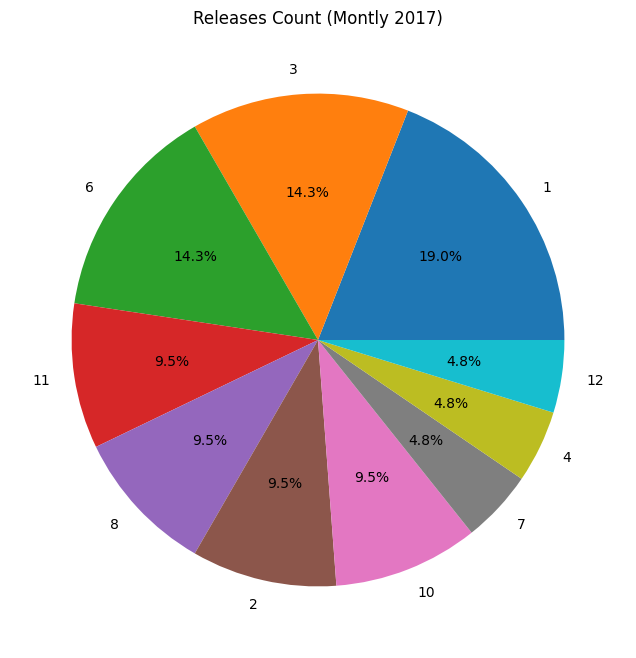

In [29]:
releases_2017 = spotify[spotify['released_year'] == 2017]
releases_2017 = releases_2017['released_month'].value_counts()
releases_2017.plot.pie(title="Releases Count (Montly 2017)", autopct='%1.1f%%', figsize=(21, 8), ylabel = "");

In [30]:
releases_2021 = spotify[spotify['released_year'] == 2021]
releases_2017 = spotify[spotify['released_year'] == 2017]
releases_2021 = releases_2021['released_month'].value_counts().sort_values()
releases_2017 = releases_2017['released_month'].value_counts().sort_values()
releases_2017

released_month
7     1
4     1
12    1
11    2
8     2
2     2
10    2
3     3
6     3
1     4
Name: count, dtype: int64

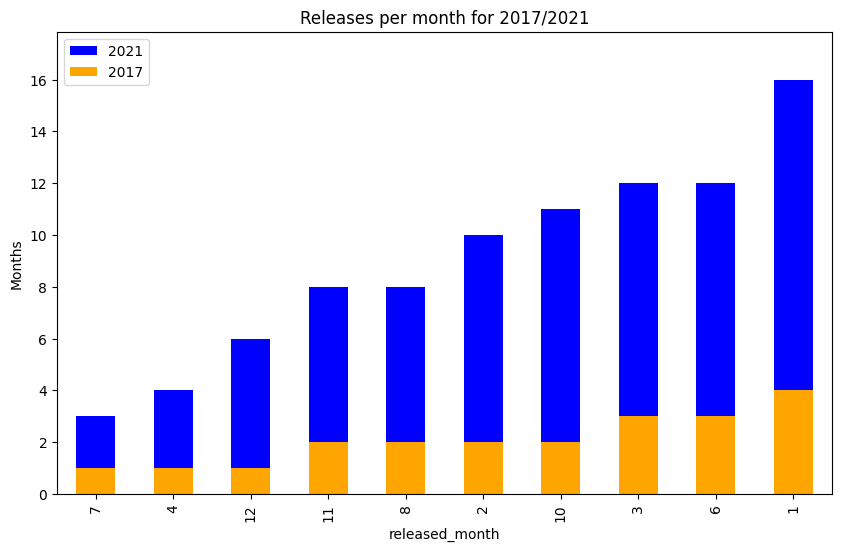

In [31]:
ax = releases_2021.plot(title="Released tracks per month",kind='bar', color='blue', figsize=(10, 6), label='2021', legend=True,)
releases_2017.plot(ylabel="Months",kind='bar', color='orange', ax=ax, label='2017', legend=True, title="Releases per month for 2017/2021");

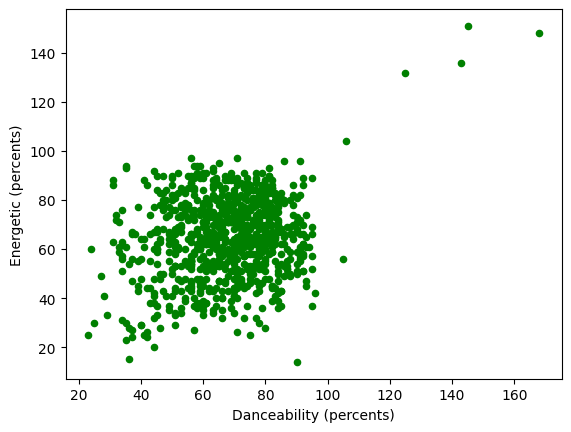

In [35]:
# and also let's plot the graph for energy and dancability correlation
plotdf = spotify.groupby("track_name")[['danceability_%', "energy_%"]].sum()
plotdf.plot.scatter(x="danceability_%", y="energy_%", color="green", xlabel="Danceability (percents)", ylabel="Energetic (percents)");

In [33]:
# finally, let's output top 10 artists on platform
topartists = spotify.groupby(["artist_name"])["streams"].sum()
topartists = topartists.sort_values(ascending=False)

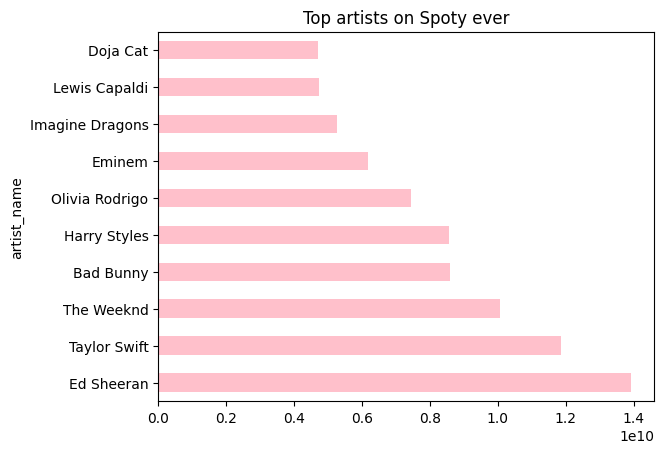

In [34]:
topartists.head(10).plot.barh(color="pink", title="Top artists on Spoty ever");